In [36]:
from langchain_openai import ChatOpenAI

In [37]:
#define all the tools we want to use

def multiply(a: int, b: int) -> int:
    """Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b


def add(a: int, b: int) -> int:
    """Adds a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """divide a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [multiply, add, divide]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [38]:
from langgraph.graph import MessagesState, StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image



def assistant(state: MessagesState):

    sys_msg = SystemMessage(content = "You are a helpful assistant tasked with performing arithmetic operations on the set of inputs.")

    return {
        "messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]
    }

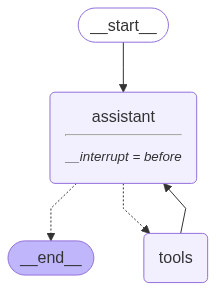

In [39]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

config = {
    "configurable": {
        "thread_id":1
    }
}

graph = StateGraph(MessagesState)
graph.add_node("assistant", assistant)
graph.add_node("tools", ToolNode(tools))

graph.set_entry_point("assistant")
graph.add_conditional_edges(
    "assistant",
    tools_condition
)

graph.add_edge("tools","assistant")

basic_graph = graph.compile(checkpointer=memory, interrupt_before=["assistant"])

display(Image(basic_graph.get_graph(xray=True).draw_mermaid_png()))

In [40]:
# initial_input = {"messages": [HumanMessage(content="Multiply 2 and 3")]}

# for event in basic_graph.stream(initial_input, config=config, stream_mode="values"):
#     print(event['messages'][-1].pretty_print())

In [41]:
# state = basic_graph.get_state(config)
# state.next

In [42]:
#starting again from where it left
# for event in basic_graph.stream(None, config=config, stream_mode="values"):
#     print(event['messages'][-1].pretty_print())

In [43]:
#combine all together...

# initial_input = {"messages": [HumanMessage(content="Multiply 2 and 3")]}

# for event in basic_graph.stream(initial_input, config=config, stream_mode="values"):
#     print(event['messages'][-1].pretty_print())

# user_approval = input("Do you want to continue? (yes/no): ").strip().lower()

# if user_approval == "yes":
#     for event in basic_graph.stream(None, config=config, stream_mode="values"):
#         print(event['messages'][-1].pretty_print())
# else:
#     print("Process terminated by user.")

In [ ]:
#combine all together upadting the state on interruption

initial_input = {"messages": [HumanMessage(content="Multiply 2 and 3")]}

for event in basic_graph.stream(initial_input, config=config, stream_mode="values"):
    print(event['messages'][-1].pretty_print())

user_approval = input("Do you want to continue? (yes/no): ").strip().lower()
if user_approval == "yes":
    basic_graph.update_state(config, {"messages":HumanMessage(content="Add 2 and 5")})
    for event in basic_graph.stream(None, config=config, stream_mode="values"):
        print(event['messages'][-1].pretty_print())
else:
    print("Process terminated by user.")

================================ Human Message =================================

Multiply 2 and 3
None
================================ Human Message =================================

Add 2 and 5
None
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uF1ICwidJt6X6C0lFgjqoqwV)
 Call ID: call_uF1ICwidJt6X6C0lFgjqoqwV
  Args:
    a: 2
    b: 3
  add (call_yHujYSAQNhKJPUq0QQys6lK2)
 Call ID: call_yHujYSAQNhKJPUq0QQys6lK2
  Args:
    a: 2
    b: 5
None
================================= Tool Message =================================
Name: add

7
None
